In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random as random
from tkinter import *

In [2]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
test_X_visual = test_X

In [4]:
train_X = train_X.reshape(60000, 784) / 255
test_X = test_X.reshape(10000, 784) / 255
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [5]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.max()+1,Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

train_Y = one_hot(train_y).T
test_Y = one_hot(test_y).T

In [6]:
print("Shape of Train_X: ", train_X.shape)
print("Shape of Train_Y: ", train_Y.shape)

Shape of Train_X:  (60000, 784)
Shape of Train_Y:  (60000, 10)


In [7]:
model = Sequential()

model.add(Dense(512, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [9]:
history = model.fit(train_X, train_Y,
                   batch_size=128, epochs=20,
                   verbose=2,
                   validation_data=(train_X, train_Y))

Epoch 1/20
469/469 - 6s - loss: 0.2502 - accuracy: 0.9252 - val_loss: 0.0896 - val_accuracy: 0.9731 - 6s/epoch - 14ms/step
Epoch 2/20
469/469 - 6s - loss: 0.1006 - accuracy: 0.9690 - val_loss: 0.0561 - val_accuracy: 0.9823 - 6s/epoch - 13ms/step
Epoch 3/20
469/469 - 6s - loss: 0.0712 - accuracy: 0.9774 - val_loss: 0.0352 - val_accuracy: 0.9892 - 6s/epoch - 13ms/step
Epoch 4/20
469/469 - 6s - loss: 0.0568 - accuracy: 0.9816 - val_loss: 0.0311 - val_accuracy: 0.9902 - 6s/epoch - 13ms/step
Epoch 5/20
469/469 - 6s - loss: 0.0484 - accuracy: 0.9836 - val_loss: 0.0210 - val_accuracy: 0.9934 - 6s/epoch - 13ms/step
Epoch 6/20
469/469 - 6s - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0134 - val_accuracy: 0.9963 - 6s/epoch - 13ms/step
Epoch 7/20
469/469 - 6s - loss: 0.0339 - accuracy: 0.9889 - val_loss: 0.0133 - val_accuracy: 0.9959 - 6s/epoch - 13ms/step
Epoch 8/20
469/469 - 6s - loss: 0.0308 - accuracy: 0.9898 - val_loss: 0.0103 - val_accuracy: 0.9969 - 6s/epoch - 13ms/step
Epoch 9/20
469/4

In [10]:
save_dir = "/Desktop/Neural Network Projects/Handwriting Recognition/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /Desktop/Neural Network Projects/Handwriting Recognition/keras_mnist.h5 


In [13]:
mnist_model = load_model("/Desktop/Neural Network Projects/Handwriting Recognition/keras_mnist.h5")

loss_and_metrics = mnist_model.evaluate(test_X, test_Y)

predicted_classes = mnist_model.predict(test_X)

print("Model loss: ", loss_and_metrics[0])
print("Model accuracy: ", loss_and_metrics[1])

313/313 [==============================] - 1s 3ms/step
Model loss:  0.0800371915102005
Model accuracy:  0.9825999736785889


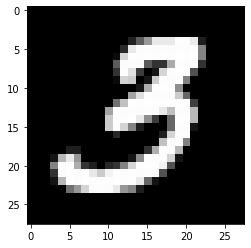

Actual Value:  3
Predicted Value:  3


In [18]:
random_number = random.randint(1, 9999)

image = test_X_visual[random_number]
plt.imshow(image, cmap='gray')
plt.show()

print("Actual Value: ", test_y[random_number])
print("Predicted Value: ", np.argmax(predicted_classes[random_number]))